DES là một thuật toán mã hóa theo khối

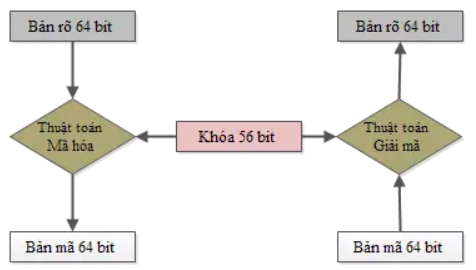

Đầu vào của DES là khối 64 bit, đầu ra cũng là khối 64 bit. Khóa mã hóa có độ dài 56 bit, nhưng thực chất ban đầu là 64 bit, được lấy đi các bit ở vị trí chia hết cho 8 dùng để kiểm tra tính chẵn lẻ.

Thuật toán

Quá trình mã hóa được tạo thành bởi 2 phép hoán vị P-box, đây là những phép hoán vị khởi tạo và kết thúc, gồm 16 chu kỳ Feistel. Trước khi đi vào 16 chu trình chính, khối dữ liệu cần bảo mật sẽ được tách ra thành từng khối 64 bit, và từng khối 64 bit này sẽ lần lượt được đưa vào 16 vòng mã hóa DES để thực hiện.

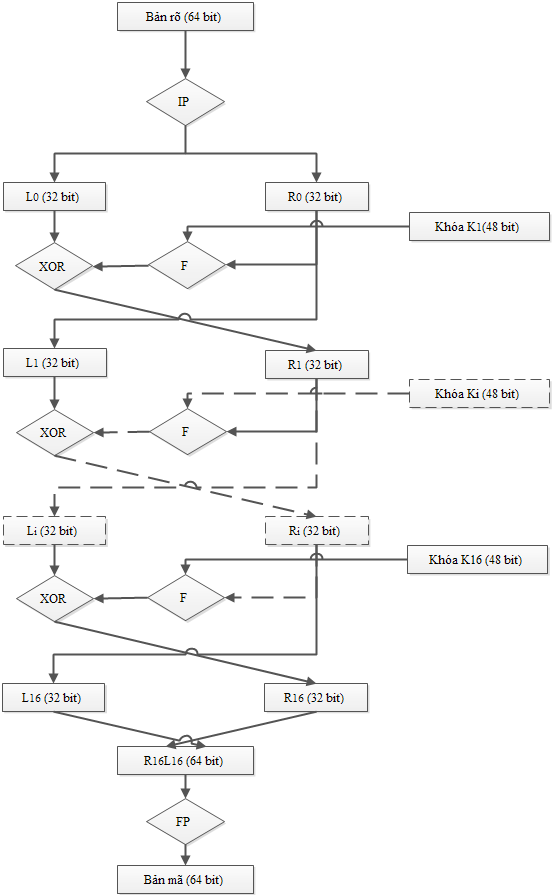


Quá trình sinh khóa con

16 vòng lặp của DES chạy cùng thuật toán như nhau nhưng với 16 khóa con khác nhau. Các khóa con đều được sinh ra từ khóa chính của DES bằng thuật toán sinh khóa con. Khóa ban đầu là 1 xâu có độ dài 64 bit, bit thứ 8 của mỗi byte sẽ được lấy ra để kiểm tra phát hiện lỗi, tạo ra chuỗi 56 bit. Sau khi bỏ các bit kiểm tra ta sẽ hoán vị chuỗi 56 bit này. Hai bước trên được thực hiện thông qua hoán vị ma trận Parity-bit drop.

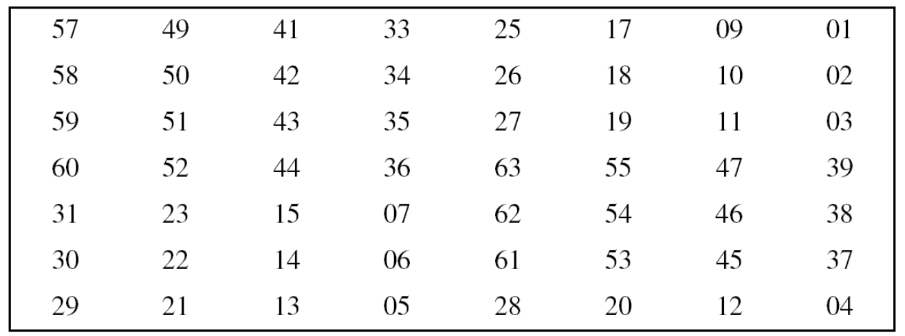

Tiếp theo ta có kết quả sau khi Parity-bit drop thành 2 phần : C0 : 28 bit đầu. D0 : 28 bit cuối. Mỗi phần sẽ được xử lý 1 cách độc lập. Ci = LSi(Ci-1) Di = LSi(Ci-1) với 1 ≤ i ≤ 16. LSi là biểu diễn phép dịch bit vòng (cyclic shift) sang trái 1 hoặc 2 vị trí tùy thuộc vào i.

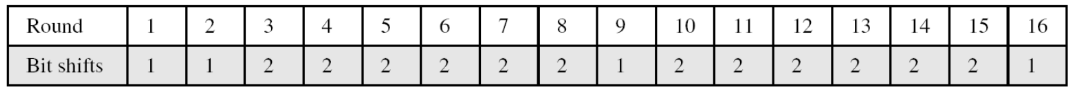

Cuối cùng sử dụng hoán vị cố định Parity-bit drop để hoán vị chuỗi CiDi 56 bit tạo thành khóa Ki với 48 bit.

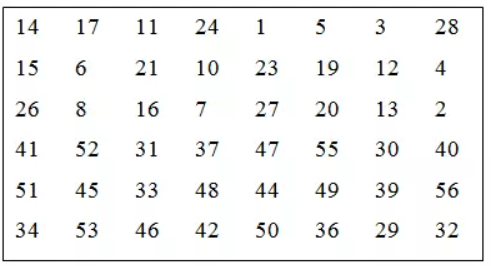

Quá trình mã hóa DES. 3 giai đoạn

Giai đoạn 1: Với bản rõ cho trước x, 1 xâu x' sẽ được tạo bằng cách hoán vị các bit của x theo hoán vị ban đầu IP:

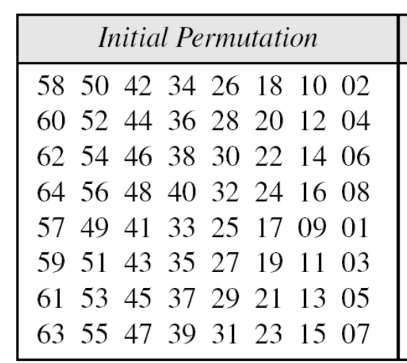

Giai đoạn 2: Tính toán 16 lần bằng 1 hàm xác định. Ta sẽ tính Li, Ri (1 ≤ i ≤ 16) theo quy tắc: Li = Ri-1. Ri = Li-1 XOR f(Ri-1, Ki). Với Ki là khóa được sinh ra ở quá trình tạo khóa, f là hàm DES.

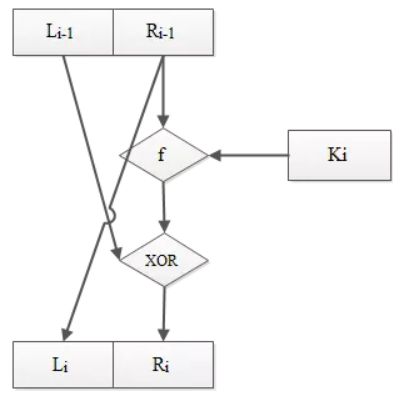

Giai đoạn 3: Áp dụng hoán vị kết thúc FP cho xâu bit R16L16 ta thu được bản mã y: y = FP(R16L16).

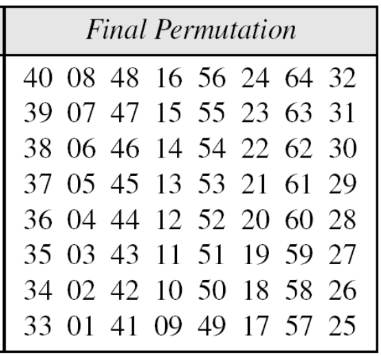

Quá trình giải mã DES: Quá trình giải mã của DES cũng tương tự quá trình mã hóa. Chỉ khác nhau ở: Li = Ri-1. Ri = Li-1 XOR f(Ri-1, K16-i+1). Như vậy khóa K của hàm F sẽ đi từ khóa K16 đến khóa K1.


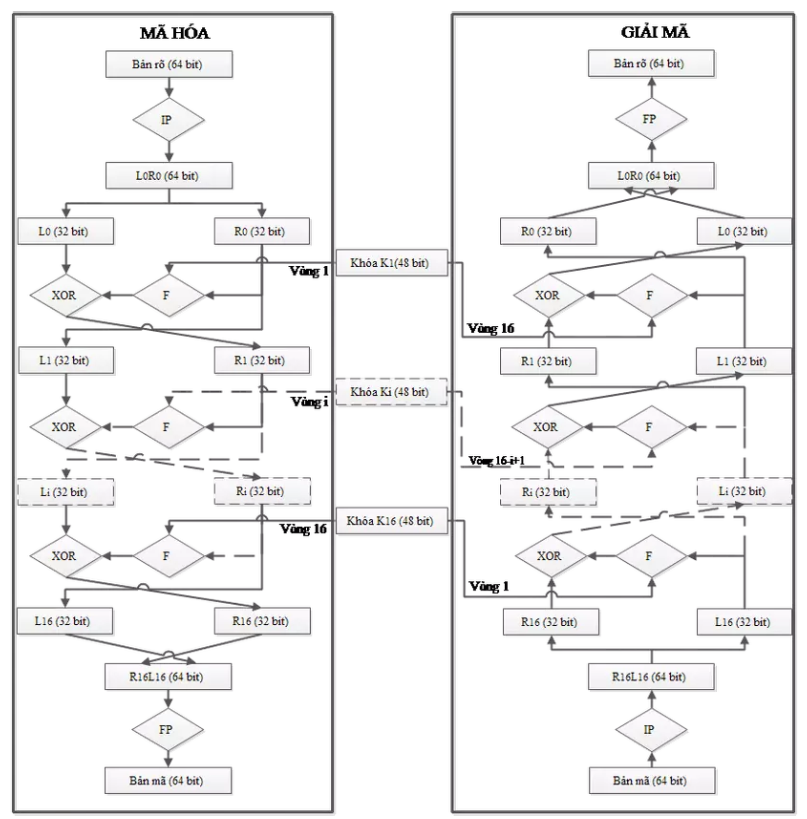

Trái tim của DES là hàm DES. Hàm DES áp dụng khóa 48 bit cho 32 bit ngoài cùng bên phải để tạo đầu ra 32 bit.

Đầu vào hàm F có 2 biến: biến thứ nhất Ri-1 là xâu bit có độ dài 32 bit, biến thứ hai Ki là xâu bit có độ dài 48 bit. Đầu ra của hàm f là xâu có độ dài 32 bit. Quy trình hoạt động của hàm f như sau:
  
- Biến thứ nhất Ri-1 được mở rộng thành một xâu có độ dài 48 bit theo một hàm mở rộng hoán vị E (Expansion permutation). Thực chất hàm mở rộng E(Ri-1) là một hoán vị có lặp trong đó lặp lại 16 bit của Ri-1.


- Tính E(Ri-1) XOR Ki.

- Tách kết quả của phép tính trên thành 8 xâu 6 bit B1, B2,…, B8.


- Đưa các khối 8 bit Bi vào 8 bảng S1, S2, …, S8 (được gọi là các hộp S-box). Mỗi hộp S-Box là một bảng 4*16 cố định có các cột từ 0 đến 15 và các hàng từ 0 đến 3. Với mỗi xâu 6 bit Bi = b1b2b3b4b5b6 ta tính được SiBi như sau: hai bit b1b6 xác định hàng r trong hộp Si, bốn bit b2b3b4b5 xác định cột c trong hộp Si. Khi đó, Si(Bi) sẽ xác định phần tử Ci = Si(r,c), phần tử này viết dưới dạng nhị phân 4 bit. Như vậy, 8 khối 6 bit Bi (1<i<8) sẽ cho ra 8 khối 4 bit Ci với (1<i<8).


- Xâu bit C = C1C2C3C4C5C6C7C8 có độ dài 32 bit được hoán vị theo phép toán hoán vị P (hộp P-Box). Kết quả P(C) sẽ là kết quả của hàm f.


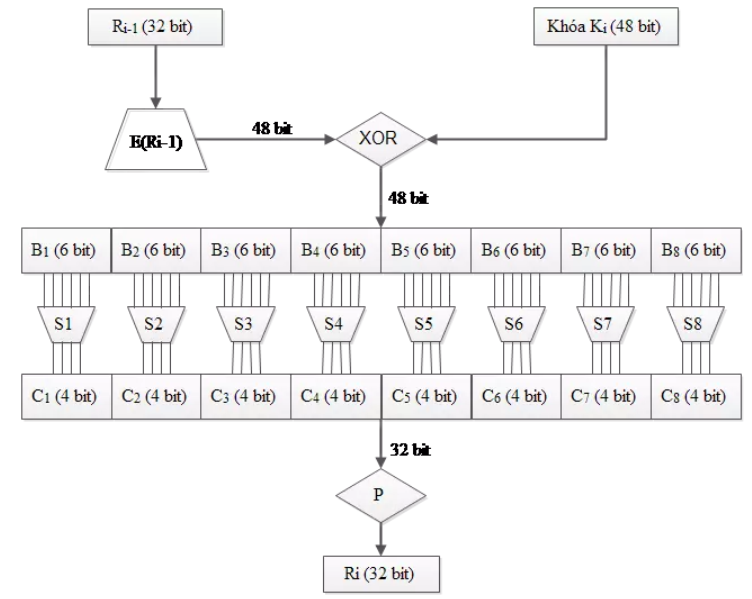

Hộp P mở rộng:


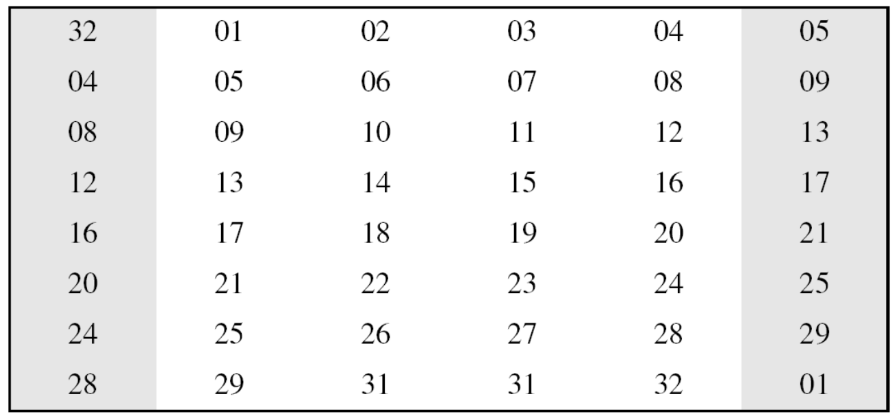


Phép XOR


Sau khi mở rộng phép hoán vị, DES sử dụng phép XOR trong phần bên phải mở rộng và khóa vòng.


Hộp S

Các hộp S thực hiện sự trộn lẫn. DES dùng 8 hộp S, mỗi hộp có đầu vào 6-bit và đầu ra 4-bit.


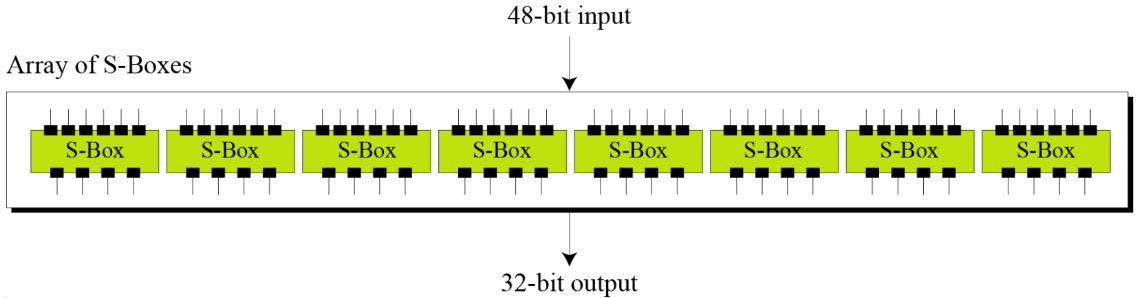

Quy tắc hộp chữ S

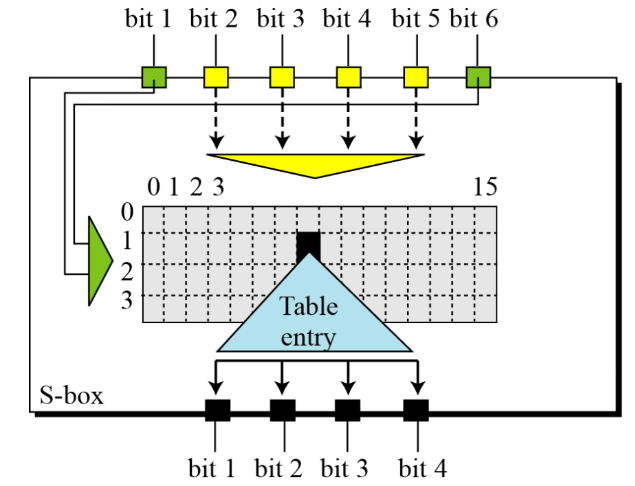

Các hộp S:

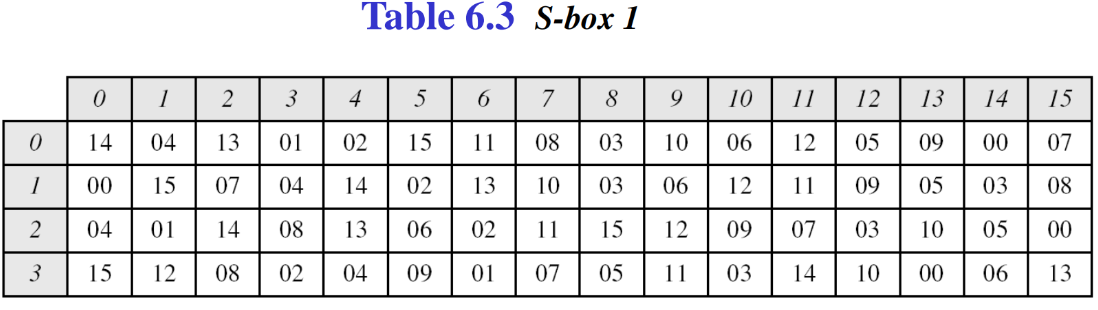
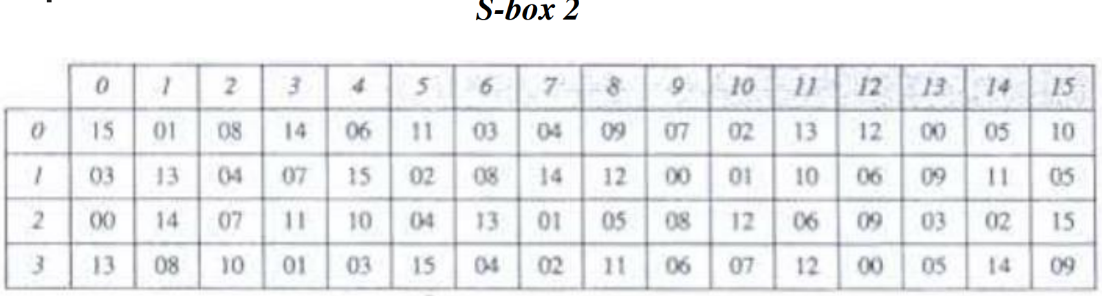
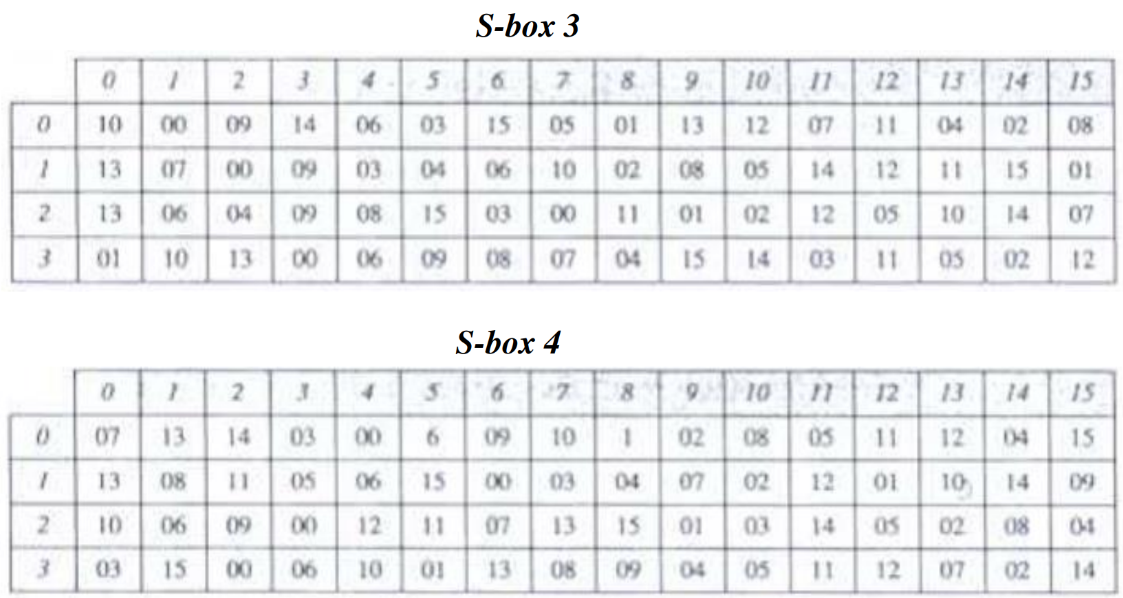
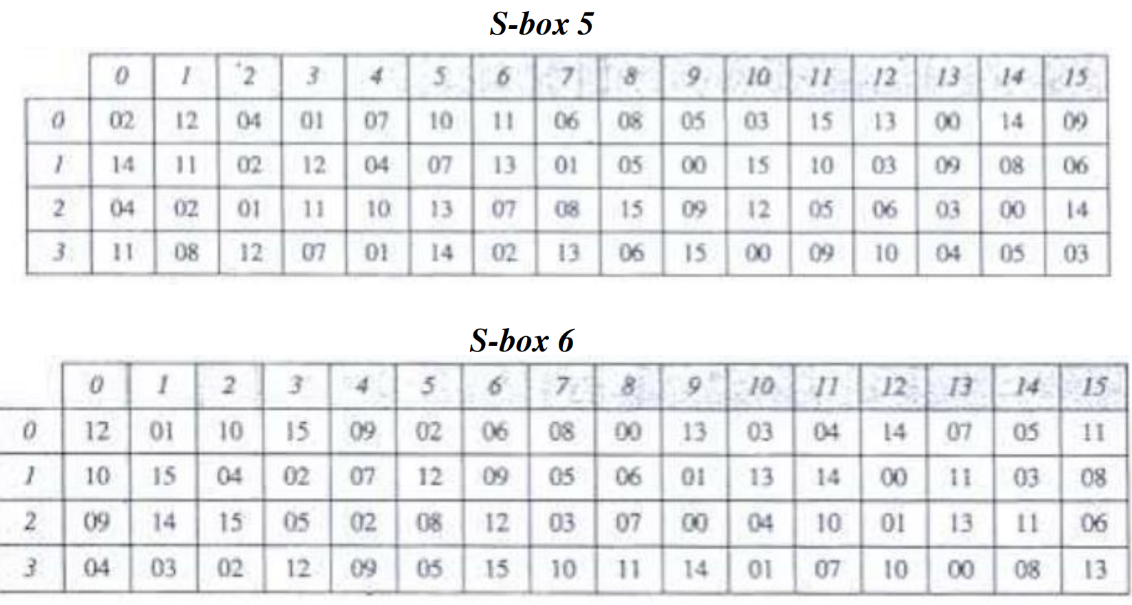
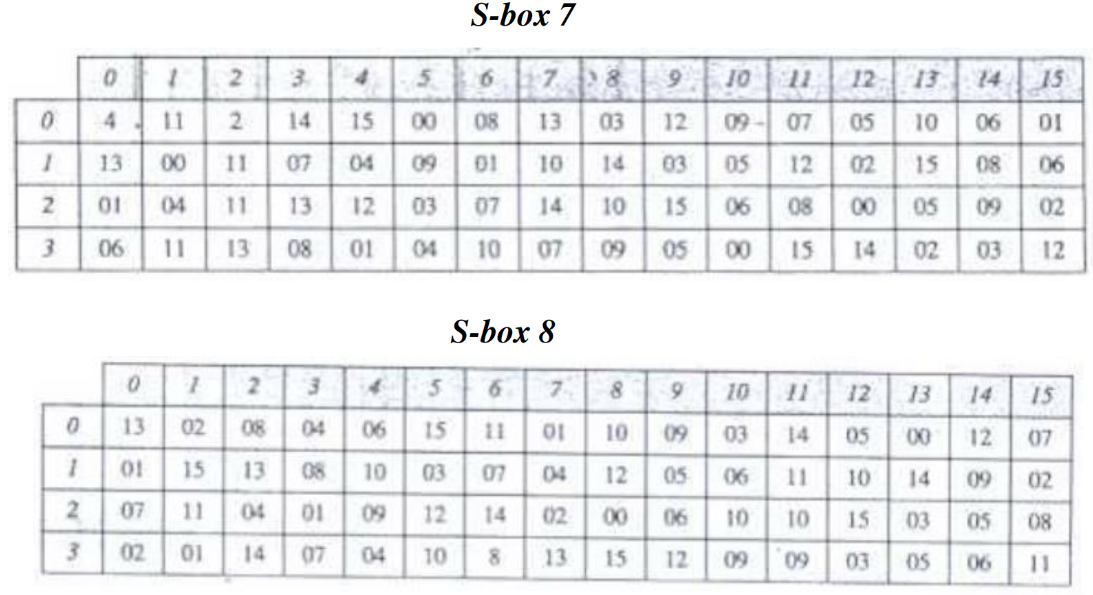

Straight Permutation(hoán vị thẳng) 

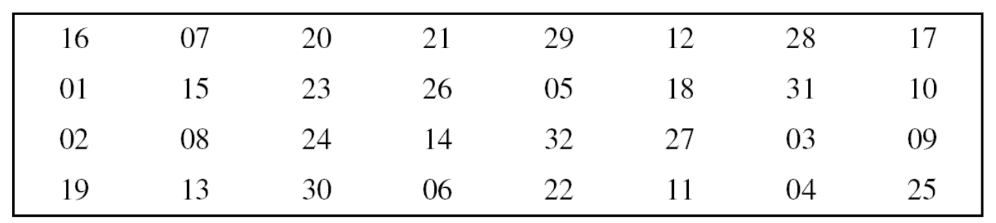

Mã thuận và mã nghịch

DES sử dụng bộ trộn và trao đổi, có thể tạo ra mã và mã nghịch đảo 16 vòng.

Vòng cuối cùng khác với các vòng khác là chỉ có một bộ trộn và không có bộ trao đổi nào.

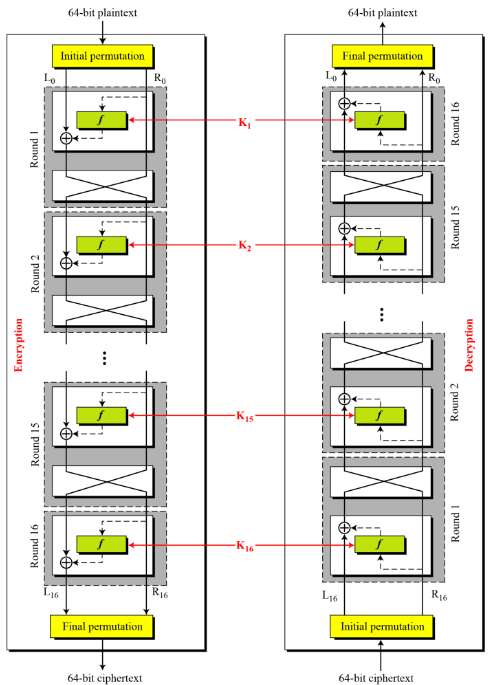

Ví dụ: 

In [6]:
import numpy as np
import time

IP = [58, 50, 42, 34, 26, 18, 10, 2,
      60, 52, 44, 36, 28, 20, 12, 4,
      62, 54, 46, 38, 30, 22, 14, 6,
      64, 56, 48, 40, 32, 24, 16, 8,
      57, 49, 41, 33, 25, 17, 9, 1,
      59, 51, 43, 35, 27, 19, 11, 3,
      61, 53, 45, 37, 29, 21, 13, 5,
      63, 55, 47, 39, 31, 23, 15, 7]

FP = [40, 8, 48, 16, 56, 24, 64, 32,
        39, 7, 47, 15, 55, 23, 63, 31,
        38, 6, 46, 14, 54, 22, 62, 30,
        37, 5, 45, 13, 53, 21, 61, 29,
        36, 4, 44, 12, 52, 20, 60, 28,
        35, 3, 43, 11, 51, 19, 59, 27,
        34, 2, 42, 10, 50, 18, 58, 26,
        33, 1, 41, 9, 49, 17, 57, 25]

EBox = [32,1,2,3,4,5,
            4,5,6,7,8,9,
            8,9,10,11,12,13,
            12,13,14,15,16,17,
            16,17,18,19,20,21,
            20,21,22,23,24,25,
            24,25,26,27,28,29,
            28,29,30,31,32,1]

SBox =[
		# S1
		[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7,
		 0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8,
		 4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0,
		 15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13],

		# S2
		[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10,
		 3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5,
		 0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15,
		 13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9],

		# S3
		[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8,
		 13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1,
		 13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7,
		 1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12],

		# S4
		[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15,
		 13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9,
		 10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4,
		 3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14],

		# S5
		[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9,
		 14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6,
		 4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14,
		 11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3],

		# S6
		[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11,
		 10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8,
		 9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6,
		 4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13],

		# S7
		[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1,
		 13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6,
		 1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2,
		 6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12],

		# S8
		[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7,
		 1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2,
		 7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8,
		 2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11],
	]

F_PBox = [16, 7, 20, 21, 29, 12, 28, 17,
              1, 15, 23, 26, 5, 18, 31, 10,
              2, 8, 24, 14, 32, 27, 3, 9,
              19, 13, 30, 6, 22, 11, 4, 25 ]

key_PBox = [14,    17,   11,    24,     1,    5,
                  3,    28,   15,     6,    21,   10,
                 23,    19,   12,     4,    26,    8,
                 16,     7,   27,    20,    13,    2,
                 41,    52,   31,    37,    47,   55,
                 30,    40,   51,    45,    33,   48,
                 44,    49,   39,    56,    34,  53,
                 46,    42,   50,    36,    29,   32]


def xor(left,xorstream):
    xorresult = np.logical_xor(left,xorstream)

    xorresult  = xorresult.astype(int)

    return xorresult

def E_box(right):
    expanded = np.empty(48)
    j = 0
    for i in EBox:
        expanded[j] = right[i - 1]
        j += 1
    expanded = list(map(int,expanded))
    expanded = np.array(expanded)
    return expanded


def sboxloopup(sinput,x):
    tableno = x - 1
    row = int((np.array2string(sinput[0]) + np.array2string(sinput[5])),2)

    column = sinput[1:5]
    column = np.array2string(column)
    column = column[1:8].replace(" ", "")
    column = int(column,2)

    elementno = (16 * row) + column
    soutput = SBox[tableno][elementno]
    soutput = list(np.binary_repr(soutput, width=4))
    soutput= np.array(list(map(int, soutput)))
    return soutput

def sbox(sboxin):
    sboxin1 = sboxin[0:6]
    sboxout1 = sboxloopup(sboxin1,1)
    sboxin2 = sboxin[6:12]
    sboxout2 = sboxloopup(sboxin2,2)
    sboxin3 = sboxin[12:18]
    sboxout3 = sboxloopup(sboxin3, 3)
    sboxin4 = sboxin[18:24]
    sboxout4 = sboxloopup(sboxin4, 4)
    sboxin5 = sboxin[24:30]
    sboxout5 = sboxloopup(sboxin5, 5)
    sboxin6 = sboxin[30:36]
    sboxout6 = sboxloopup(sboxin6, 6)
    sboxin7 = sboxin[36:42]
    sboxout7 = sboxloopup(sboxin7, 7)
    sboxin8 = sboxin[42:48]
    sboxout8 = sboxloopup(sboxin8, 8)
    sboxout = np.concatenate([sboxout1,sboxout2,sboxout3,sboxout4,sboxout5,sboxout6,sboxout7,sboxout8])
    return sboxout

def f_permute(topermute):
    permuted= np.empty(32)
    j = 0
    for i in F_PBox:
        permuted[j] = topermute[i - 1]
        j += 1
    return permuted

def f_function(right,rkey):
    expanded = E_box(right)
    xored = xor(expanded,rkey)
    sboxed = sbox(xored)
    xorstream = f_permute(sboxed)
    return xorstream

def round(data,rkey):
    l0 = data[0:32]
    r0 = data[32:64]
    xorstream = f_function(r0,rkey)
    r1 = xor(l0,xorstream)
    l1 = r0
    returndata = np.empty_like(data)
    returndata[0:32] = l1
    returndata[32:64] = r1
    return(returndata)

def permutation(data,x):
    permute1 = np.empty_like(IP)
    if x == 0:
        j = 0
        for i in IP:
            permute1[j] = data[i-1]
            j += 1
        return(permute1)
    else:
        permute2 = np.empty_like(FP)
        k = 0
        for l in FP:
            permute2[k] = data[l-1]
            k += 1
        return(permute2)

def userinput():
    keyinp = input("Enter the key bits (56 bits) seperated by space " "").strip().split()
    datainp = input("Enter the data bits (64) to encrypt or decrypt seperated by space " "").strip().split()
    lenofkey = 56
    lenofdata = 64
    if len(datainp) == lenofdata and len(keyinp) == lenofkey:
        print("data entry accepted, data loaded succesfully")
        print("key entry accepted, key loaded succesfully")
    else:
        while len(datainp) != lenofdata:
            print("length of data entered ",len(datainp))
            datainp = input("Error in entered data. Enter the data (64 bits) to encrypt or decrypt seperated by space " "").strip().split()

        print("data entry accepted, data loaded succesfully")
        while len(keyinp) != lenofkey:
            print("length of key entered ", len(keyinp))
            keyinp = input("Error in entered key. Enter the key (56 bits) to encrypt or decrypt seperated by space " "").strip().split()
        print("key entry accepted, key loaded succesfully")

    return keyinp,datainp


def keyshift(toshift,n):
    if (n == 1) or (n == 2) or (n == 9) or (n == 16):
        toshift= np.roll(toshift,-1)
        return toshift
    else:
        toshift = np.roll(toshift, -2)
        return toshift

def keypermute(key16):
    keypermuted = np.empty([16,48])
    l = 0
    for k in key16:
        j = 0
        for i in key_PBox:
            keypermuted[l][j] = k[i - 1]
            j += 1
        l += 1
    return keypermuted


def keyschedule(key):
    left = key[0:28]
    right = key[28:56]
    shifted = np.zeros(56)
    key16 = np.zeros([16,56])
    for i in range(1,17):
        shifted[0:28] = keyshift(left,i)
        shifted[28:56] = keyshift(right,i)
        left = shifted[0:28]
        right = shifted[28:56]

        key16[i - 1] = shifted

    key16 = keypermute(key16)
    key16 = [list(map(int, x)) for x in key16]
    key16 = np.array(key16)
    return key16


def main():
    key, data = userinput()
    operate = int(input("Choose 0 for encryption or Choose 1 for decryption "))
    starttime = time.time()
    key16 = keyschedule(key)

    if operate == 0:
        data = permutation(data,0)

        for i in range(16):
            data = round(data,key16[i])



        data = np.roll(data,32)
        data = (permutation(data, 1))
        print("Time taken to encrypt the data with DES is", time.time() - starttime)
        print("Encrypted data is", data)

    if operate == 1:
        data = permutation(data, 0)
        
        for i in range(16):
            data = round(data, key16[16 - (i + 1)])

        data = np.roll(data, 32)
        data = (permutation(data, 1))
        print("Time taken to decrypt the data with DES is", time.time() - starttime)
        print("Decrypted data is", data)
main()

Enter the key bits (56 bits) seperated by space  1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0
Enter the data bits (64) to encrypt or decrypt seperated by space  0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0


data entry accepted, data loaded succesfully
key entry accepted, key loaded succesfully


Choose 0 for encryption or Choose 1 for decryption  0


Time taken to encrypt the data with DES is 0.016988039016723633
Encrypted data is [1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1
 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0]


PLaintext: 123456ABCD132536

Key: AABB09182736CCDD

Ciphertext: C0B7A8D05F3A8296